# Exploratory Data Analysis (EDA) with Python

In [2]:
from datasets import load_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

d:\Github\Text_Summarizer\windows_venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Load the dataset
dataset = load_dataset("cnn_dailymail","3.0.0", cache_dir="./cache")
df= dataset["train"]
df=pd.DataFrame(df)

In [4]:
df.head()

,article,highlights,id
0,"LONDON, England (Reuters) -- Harry Potter star...",Harry Potter star Daniel Radcliffe gets £20M f...,42c027e4ff9730fbb3de84c1af0d2c506e41c3e4
1,Editor's note: In our Behind the Scenes series...,Mentally ill inmates in Miami are housed on th...,ee8871b15c50d0db17b0179a6d2beab35065f1e9
2,"MINNEAPOLIS, Minnesota (CNN) -- Drivers who we...","NEW: ""I thought I was going to die,"" driver sa...",06352019a19ae31e527f37f7571c6dd7f0c5da37
3,WASHINGTON (CNN) -- Doctors removed five small...,"Five small polyps found during procedure; ""non...",24521a2abb2e1f5e34e6824e0f9e56904a2b0e88
4,(CNN) -- The National Football League has ind...,"NEW: NFL chief, Atlanta Falcons owner critical...",7fe70cc8b12fab2d0a258fababf7d9c6b5e1262a


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287113 entries, 0 to 287112
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   article     287113 non-null  object
 1   highlights  287113 non-null  object
 2   id          287113 non-null  object
dtypes: object(3)
memory usage: 6.6+ MB


In [6]:
df.describe(include='all')

,article,highlights,id
count,287113,287113,287113
unique,284005,282197,287113
top,"(CNN) -- Esra'a al Shafei, a recent universit...",This page includes the show Transcript and the...,8ec9ff4d633dd4cc26d53f503c33f7464b43c36e
freq,3,83,1


In [7]:
df.isna().sum()

article       0
highlights    0
id            0
dtype: int64

In [8]:
df.isnull().sum()

article       0
highlights    0
id            0
dtype: int64

In [9]:
df.columns

Index(['article', 'highlights', 'id'], dtype='object')

In [10]:
# Article and highlights length
df["article_length"] = df["article"].apply(lambda x: len(x.split()))
df["highlights_length"] = df["highlights"].apply(lambda x: len(x.split()))

# print basic statistics
print(df[["article_length", "highlights_length"]].describe())


       article_length  highlights_length
count   287113.000000      287113.000000
mean       691.870326          51.574101
std        336.500292          21.256336
min          8.000000           4.000000
25%        443.000000          38.000000
50%        632.000000          48.000000
75%        877.000000          60.000000
max       2347.000000        1296.000000


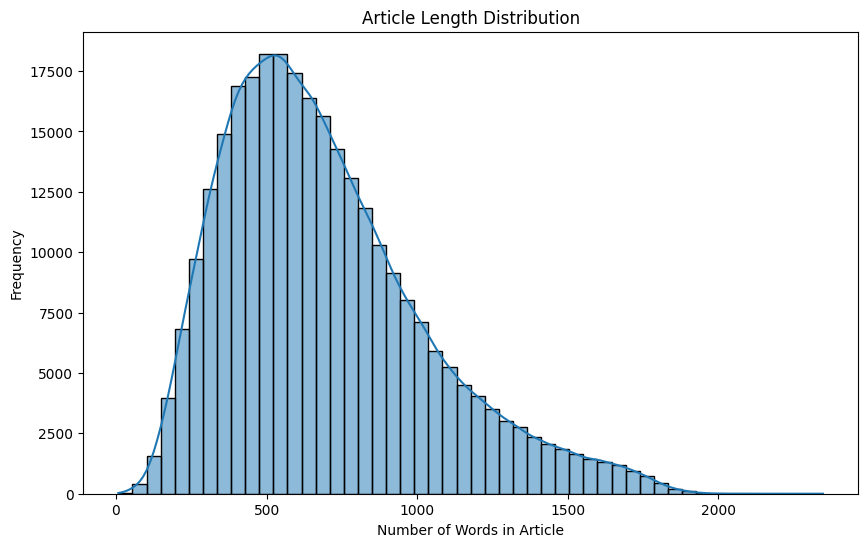

In [11]:
# Plot article length distribution
plt.figure(figsize=(10, 6))
sns.histplot(df["article_length"], bins=50, kde=True)
plt.title("Article Length Distribution")
plt.xlabel("Number of Words in Article")
plt.ylabel("Frequency")
plt.savefig("plots/article_length_distribution.png")
plt.show()

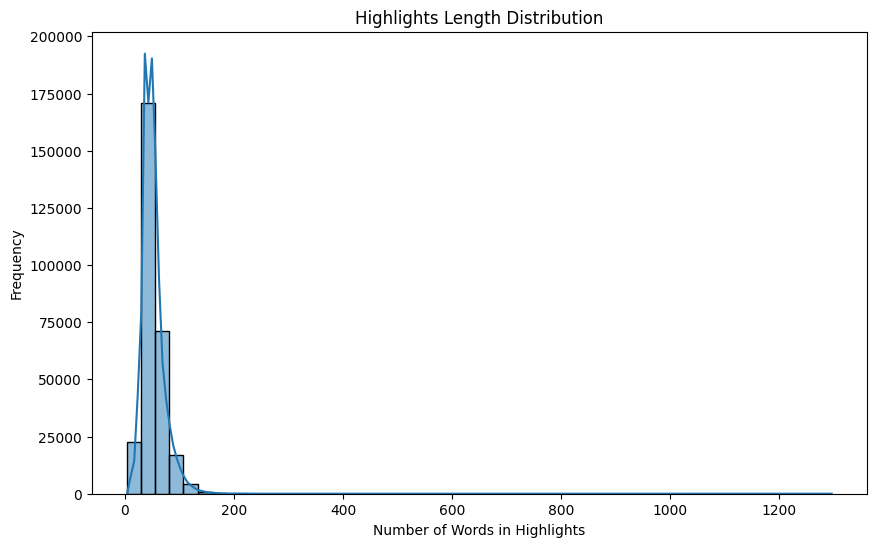

In [12]:
# Plot Highlights length distribution
plt.figure(figsize=(10, 6))
sns.histplot(df["highlights_length"], bins=50, kde=True)
plt.title("Highlights Length Distribution")
plt.xlabel("Number of Words in Highlights")
plt.ylabel("Frequency")
plt.savefig("plots/highlights_length_distribution.png")
plt.show()

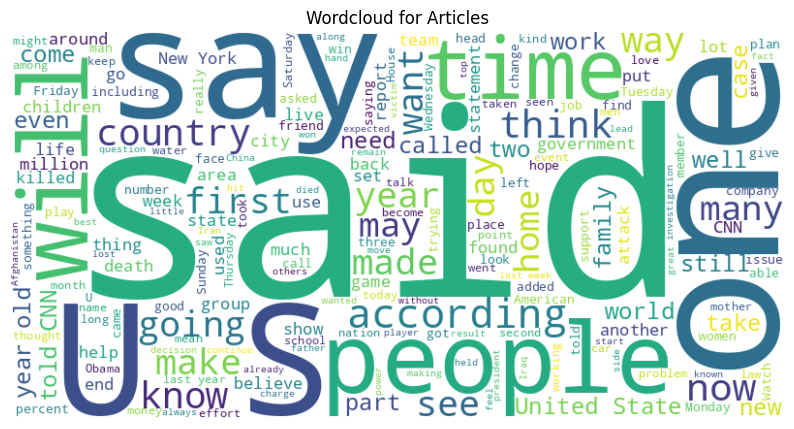

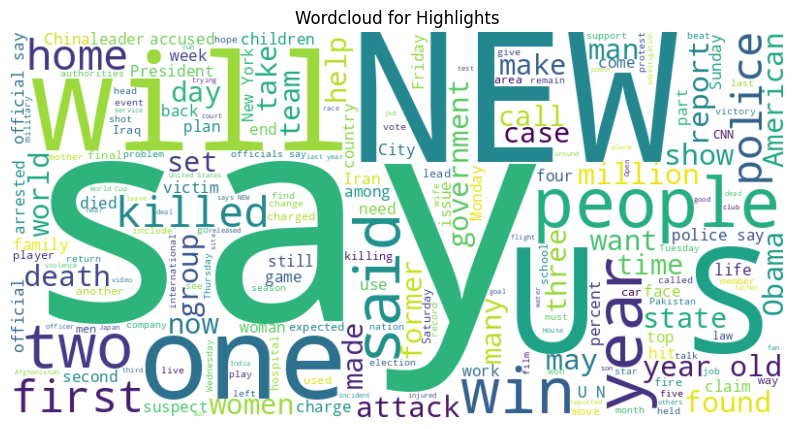

In [14]:
# Wordclouds for articles and highlights
text_articles = " ".join(article for article in df.article[:30000])
text_highlights = " ".join(highlight for highlight in df.highlights[:30000])

# Wordcloud for articles
wordcloud_articles = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(text_articles)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_articles, interpolation='bilinear')
plt.axis('off')
plt.title("Wordcloud for Articles")
plt.savefig("plots/wordcloud_articles.png")
plt.show()

# Wordcloud for highlights
wordcloud_highlights = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(text_highlights)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_highlights, interpolation='bilinear')
plt.axis('off')
plt.title("Wordcloud for Highlights")
plt.savefig("plots/wordcloud_highlights.png")
plt.show()